In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df1=pd.read_csv('Housing.csv')
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


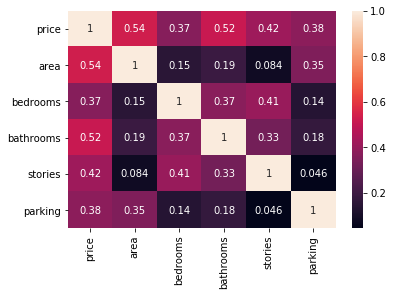

In [4]:
sns.heatmap(df1.corr(),annot=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le=LabelEncoder()

In [7]:
df1.mainroad=le.fit_transform(df1['mainroad'])

In [8]:
df1.guestroom=le.fit_transform(df1['guestroom'])

In [9]:
df1.basement=le.fit_transform(df1['basement'])

In [10]:
df1.hotwaterheating=le.fit_transform(df1['hotwaterheating'])

In [11]:
df1.airconditioning=le.fit_transform(df1['airconditioning'])

In [12]:
df1.prefarea=le.fit_transform(df1['prefarea'])

In [13]:
df1.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


## dummy variable

In [14]:
#status=pd.get_dummies(df1['furnishingstatus'])

In [15]:
#status.head()

In [16]:
status=pd.get_dummies(df1['furnishingstatus'],drop_first=True)##dropping the first column we can guses that what it had

In [17]:
status.head()## 0 0 means furnished

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [18]:
df1=pd.concat([df1,status],axis=1)

In [19]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [20]:
df1.drop('furnishingstatus',axis=1,inplace=True)

In [21]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [22]:
df1.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


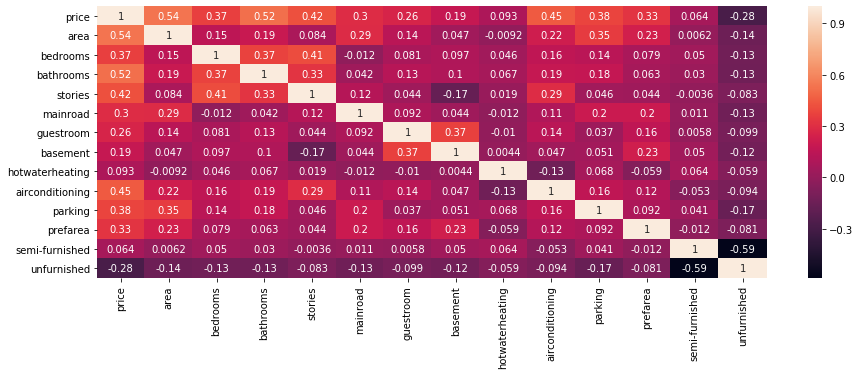

In [23]:
plt.figure(figsize=(15,5))
sns.heatmap(df1.corr(),annot=True)

In [24]:
# best correlated wrt price are 1] area 2] bathroom .........

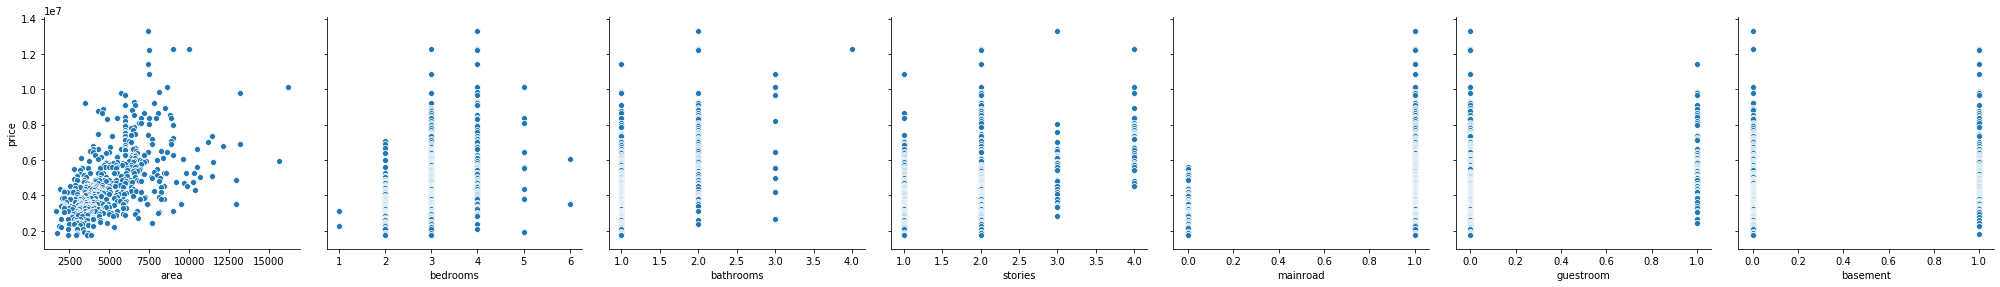

In [25]:
sns.pairplot(df1,x_vars=['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement'],y_vars='price',size=4,aspect=1,kind='scatter')

In [26]:
X=df1.drop(['price'],axis=1)
# X=df1.loc[:,['area','bedrooms','stories','airconditioning']]
y=df1[['price']]

In [27]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,0,0
5,7500,3,3,1,1,0,1,0,1,2,1,1,0
6,8580,4,3,4,1,0,0,0,1,2,1,1,0
7,16200,5,3,2,1,0,0,0,0,0,0,0,1
8,8100,4,1,2,1,1,1,0,1,2,1,0,0
9,5750,3,2,4,1,1,0,0,1,1,1,0,1


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [30]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
375,5960,3,1,2,1,1,1,0,0,0,0,0,1
187,6100,3,1,1,1,0,1,0,1,0,1,1,0
109,6615,4,2,2,1,1,0,1,0,1,0,1,0
454,4500,3,1,2,1,0,0,0,1,0,0,0,1
382,3150,3,1,2,1,0,1,0,0,0,0,0,0
211,12900,3,1,1,1,0,0,0,0,2,0,0,0
93,7200,3,2,1,1,0,1,0,1,3,0,1,0
293,4410,2,1,1,0,0,0,0,0,1,0,0,1
352,5830,2,1,1,1,0,0,0,0,2,0,0,1
532,3000,2,1,1,0,0,0,0,0,0,0,0,1


### SCALING

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [32]:
# num_vars={'area','bedrooms','bathrooms','stories','mainroad','parking','price'}
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0.306475,0.4,0.000000,0.333333,1.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,1.0
1,0.316547,0.4,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.0,1.0,0.0
2,0.353597,0.6,0.333333,0.333333,1.0,1.0,0.0,1.0,0.0,0.333333,0.0,1.0,0.0
3,0.201439,0.4,0.000000,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0
4,0.104317,0.4,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0


## RFE

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('area', True, 1),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', False, 3),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', True, 1)]

In [36]:
import statsmodels.api as sm

In [37]:
#add constant to get an intercept
X_train_sm=sm.add_constant(X_train)
#fit the regression line using OLS
lr=sm.OLS(y_train,X_train_sm).fit()

ValueError: The indices for endog and exog are not aligned

In [ ]:
lr.params

In [ ]:
print(lr.summary())

In [ ]:
## p value significance is less semi-furnished p vlue--->0.823  

## VIF
varience inflation factor or VIF gives a basics quantitive idea about how much the feacture variable are correleated with ecah other.it is important paramerter to test our model 

In [38]:
#check for the VIF value of feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,7.29
4,mainroad,5.32
0,area,4.49
3,stories,2.91
6,basement,2.18
11,semi-furnished,2.17
9,parking,2.05
8,airconditioning,1.87
12,unfurnished,1.82
2,bathrooms,1.78


In [40]:
X=X.drop(['semi-furnished'],axis=1)


In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [42]:
#add constant to get an intercept
X_train_sm=sm.add_constant(X_train)
#fit the regression line using OLS
lr=sm.OLS(y_train,X_train_sm).fit()

In [43]:
lr.params

const              6.859340e+04
area               2.554377e+02
bedrooms           4.830131e+04
bathrooms          1.013034e+06
stories            4.651313e+05
mainroad           4.352650e+05
guestroom          1.406093e+05
basement           4.481332e+05
hotwaterheating    7.711089e+05
airconditioning    8.088994e+05
parking            2.922630e+05
prefarea           7.366547e+05
unfurnished       -4.904700e+05
dtype: float64

In [44]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     63.53
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.59e-76
Time:                        21:09:47   Log-Likelihood:                -4990.0
No. Observations:                 327   AIC:                         1.001e+04
Df Residuals:                     314   BIC:                         1.006e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.859e+04   3.09e+05     

In [45]:
X=X.drop(['bedrooms'],axis=1)


In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [47]:
#add constant to get an intercept
X_train_sm=sm.add_constant(X_train)
#fit the regression line using OLS
lr=sm.OLS(y_train,X_train_sm).fit()

In [48]:
lr.params

const              1.617794e+05
area               2.562638e+02
bathrooms          1.028078e+06
stories            4.821304e+05
mainroad           4.242508e+05
guestroom          1.357757e+05
basement           4.612891e+05
hotwaterheating    7.748173e+05
airconditioning    8.069895e+05
parking            2.950623e+05
prefarea           7.418597e+05
unfurnished       -4.922861e+05
dtype: float64

In [49]:
print(lr.summary()) # now p value become 0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     69.43
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           2.16e-77
Time:                        21:10:30   Log-Likelihood:                -4990.1
No. Observations:                 327   AIC:                         1.000e+04
Df Residuals:                     315   BIC:                         1.005e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.618e+05   2.58e+05     

In [50]:
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bathrooms,7.93
0,area,7.34
2,stories,6.35
3,mainroad,6.02
5,basement,2.00
8,parking,2.00
7,airconditioning,1.82
4,guestroom,1.56
9,prefarea,1.51
10,unfurnished,1.40


In [51]:
## since we checked for p value then now check for vif > 5 then remove that column(bathrooms,area,stories)

In [52]:
X=X.drop(['guestroom'],axis=1)

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)

In [54]:
#add constant to get an intercept
X_train_sm=sm.add_constant(X_train)
#fit the regression line using OLS
lr=sm.OLS(y_train,X_train_sm).fit()

In [55]:
lr.params

const              1.268025e+05
area               2.585461e+02
bathrooms          1.038348e+06
stories            4.877025e+05
mainroad           4.375128e+05
basement           5.045709e+05
hotwaterheating    7.794915e+05
airconditioning    8.191257e+05
parking            2.863593e+05
prefarea           7.459748e+05
unfurnished       -4.920101e+05
dtype: float64

In [56]:
print(lr.summary()) # now p value become 0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     76.39
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           3.29e-78
Time:                        21:10:32   Log-Likelihood:                -4990.5
No. Observations:                 327   AIC:                         1.000e+04
Df Residuals:                     316   BIC:                         1.004e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.268e+05   2.54e+05     

In [57]:
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bathrooms,7.92
0,area,7.34
2,stories,6.34
3,mainroad,6.01
7,parking,1.97
6,airconditioning,1.79
4,basement,1.76
8,prefarea,1.50
9,unfurnished,1.39
5,hotwaterheating,1.12


In [58]:
X=X.drop(['bathrooms'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)
#add constant to get an intercept
X_train_sm=sm.add_constant(X_train)
#fit the regression line using OLS
lr=sm.OLS(y_train,X_train_sm).fit()

In [59]:
lr.params

const              986074.678391
area                  278.134372
stories            692723.129431
mainroad           286653.919684
basement           642025.192032
hotwaterheating    965244.777748
airconditioning    975836.168476
parking            362462.138688
prefarea           734170.846535
unfurnished       -562546.459048
dtype: float64

In [60]:
print(lr.summary()) # now p value become 0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     65.00
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           1.04e-66
Time:                        21:10:34   Log-Likelihood:                -5020.4
No. Observations:                 327   AIC:                         1.006e+04
Df Residuals:                     317   BIC:                         1.010e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9.861e+05   2.52e+05     

In [61]:
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,area,6.67
2,mainroad,5.98
1,stories,4.46
6,parking,1.96
5,airconditioning,1.78
3,basement,1.64
7,prefarea,1.50
8,unfurnished,1.38
4,hotwaterheating,1.11


In [62]:
X=X.drop(['mainroad'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)
#add constant to get an intercept
X_train_sm=sm.add_constant(X_train)
#fit the regression line using OLS
lr=sm.OLS(y_train,X_train_sm).fit()

In [63]:
lr.params

const              1.139533e+06
area               2.881100e+02
stories            7.059101e+05
basement           6.474494e+05
hotwaterheating    1.000694e+06
airconditioning    9.689744e+05
parking            3.732648e+05
prefarea           7.684241e+05
unfurnished       -5.767516e+05
dtype: float64

In [64]:
print(lr.summary()) # now p value become 0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     72.50
Date:                Mon, 23 Sep 2019   Prob (F-statistic):           3.94e-67
Time:                        21:10:37   Log-Likelihood:                -5021.7
No. Observations:                 327   AIC:                         1.006e+04
Df Residuals:                     318   BIC:                         1.010e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             1.14e+06   2.32e+05     

In [65]:
# create DF that vll contain all features variables and thier respective VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]## shape(1) ---> for all coloumn
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,area,5.20
1,stories,3.73
5,parking,1.95
4,airconditioning,1.77
2,basement,1.59
6,prefarea,1.48
7,unfurnished,1.38
3,hotwaterheating,1.11


## error terms